In [57]:
from keras.layers import Input, Lambda, Dense, Flatten,Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'datasets/train'
valid_path = 'datasets/val'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('datasets/train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
    
x=Dense(4096, activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(4096, activation='relu')(x)
x=Dropout(0.5)(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object

model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [4]:
pip install h5py

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.3.1 requires h5py<2.11.0,>=2.10.0, but you'll have h5py 3.0.0 which is incompatible.
tensorflow 2.3.1 requires numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.


In [58]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('datasets/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)



Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Epoch 1/20
3/3 [==============================] - 181s 60s/step - loss: 23.8943 - accuracy: 0.1398 - val_loss: 53.9852 - val_accuracy: 0.2000
Epoch 2/20
3/3 [==============================] - 21s 7s/step - loss: 56.2809 - accuracy: 0.2581 - val_loss: 22.0143 - val_accuracy: 0.2000
Epoch 3/20
3/3 [==============================] - 21s 7s/step - loss: 11.0991 - accuracy: 0.3011 - val_loss: 4.2624 - val_accuracy: 0.2400
Epoch 4/20
3/3 [==============================] - 23s 8s/step - loss: 4.1405 - accuracy: 0.2688 - val_loss: 1.8275 - val_accuracy: 0.4000
Epoch 5/20
3/3 [==============================] - 24s 8s/step - loss: 2.1629 - accuracy: 0.3226 - val_loss: 1.6119 - val_accuracy: 0.5600
Epoch 6/20
3/3 [==============================] - 22s 7s/step - loss: 1.5257 - accuracy: 0.4516 - val_loss: 1.3825 - val_accuracy: 0.4400
Epoch 7/20
3/3 [==============================] - 23s 8s/step - loss: 1.1829 - accura

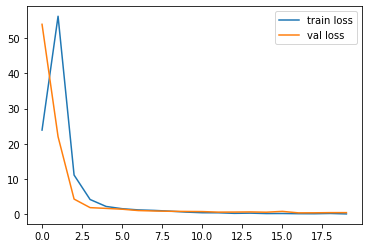

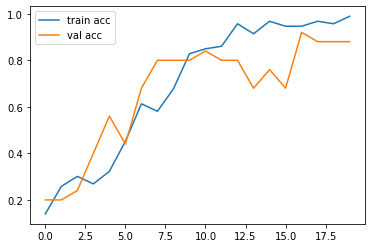

<Figure size 432x288 with 0 Axes>

In [59]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model



In [25]:
from keras.preprocessing import image

In [36]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


In [46]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [60]:
import cv2

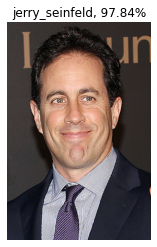

In [67]:
labels = ['ben_afflek',  'elton_john',  'jerry_seinfeld',  'madonna',  'mindy_kaling']
test_imgs = ['datasets/val/jerry_seinfeld/httpblognjcomentertainmentimpactcelebritiesmediumjerrybjpg.jpg']

for test in test_imgs:
    
    img = image.load_img(test, target_size=(240, 240))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.
    classes = model.predict(x)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)
    
    img = cv2.imread(test, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.title("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))
    plt.imshow(img)
    
    #print("{}, {:.2f}%".format(labels[result_indices], result[result_indices]*100))